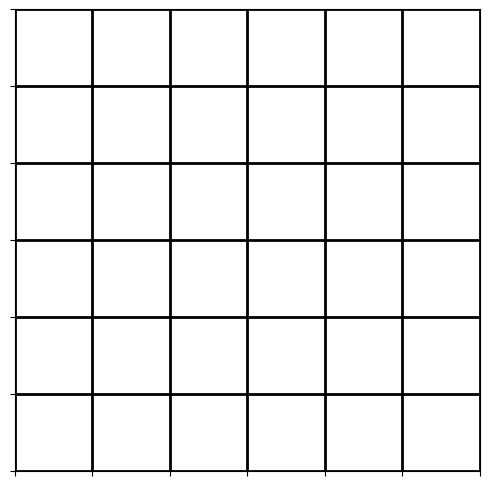

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 0 0
Enter the quadrant (1-4) to rotate: 1
Enter the direction (clockwise or counterclockwise): counterclockwise


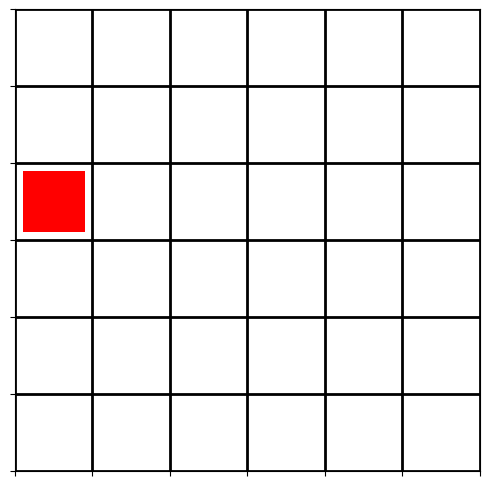

Player 2's turn
AI placed at (0, 0)
AI rotated quadrant 1 clockwise


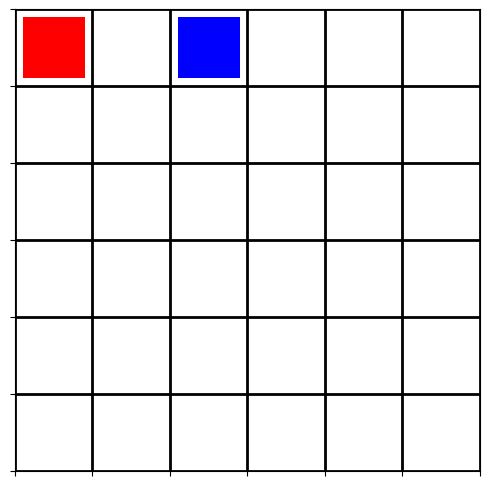

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 3 3
Enter the quadrant (1-4) to rotate: 1
Enter the direction (clockwise or counterclockwise): clockwise


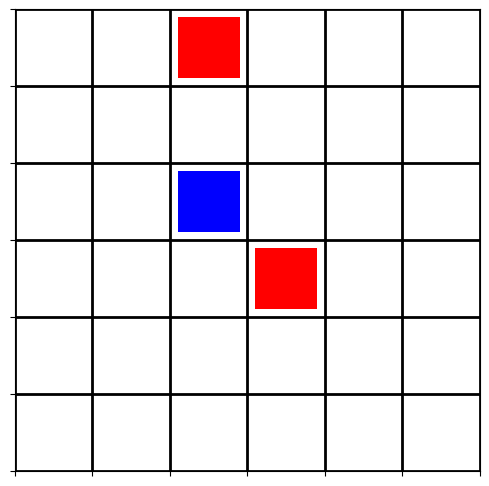

Player 2's turn
AI placed at (0, 0)
AI rotated quadrant 1 clockwise


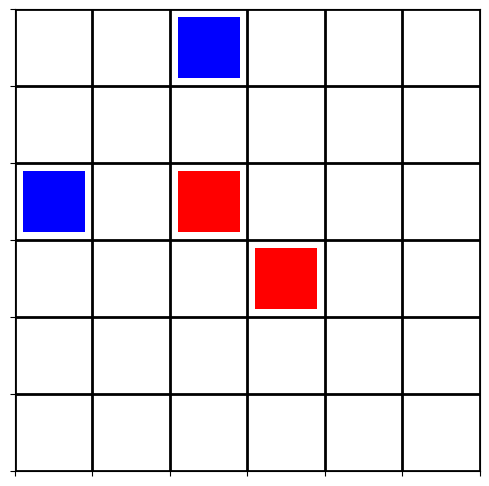

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 4 4
Enter the quadrant (1-4) to rotate: 1
Enter the direction (clockwise or counterclockwise): counterclockwise


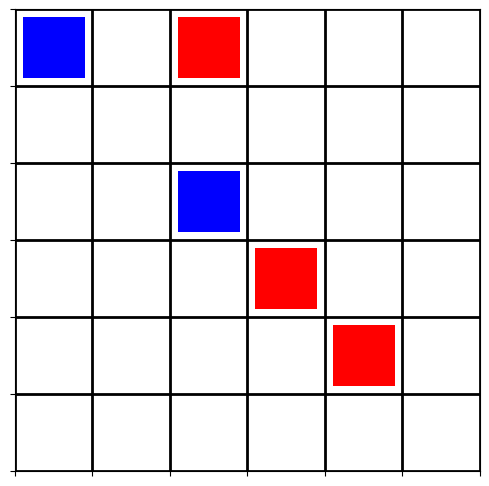

Player 2's turn
AI placed at (0, 1)
AI rotated quadrant 1 clockwise


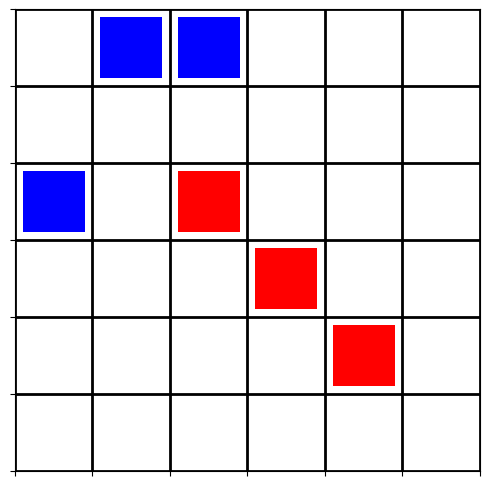

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 5 5
Enter the quadrant (1-4) to rotate: 1
Enter the direction (clockwise or counterclockwise): counterclockwise


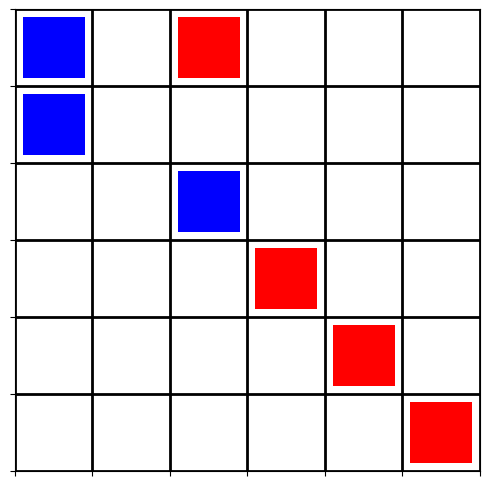

Player 2's turn
AI placed at (0, 2)
AI rotated quadrant 1 clockwise


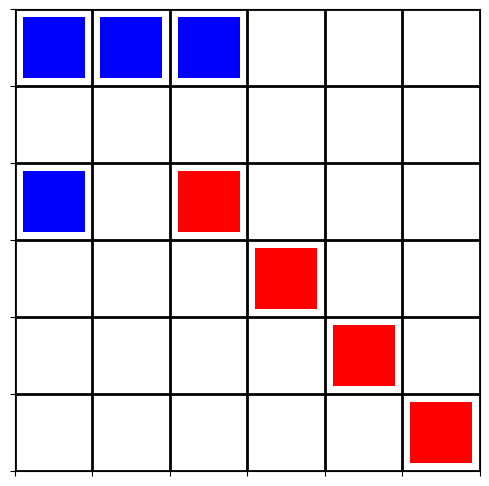

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 0 1
Enter the quadrant (1-4) to rotate: 2
Enter the direction (clockwise or counterclockwise): clockwise


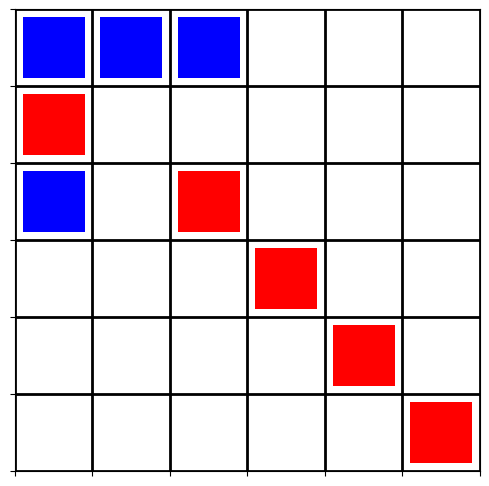

Player 2's turn
AI placed at (1, 1)
AI rotated quadrant 1 clockwise


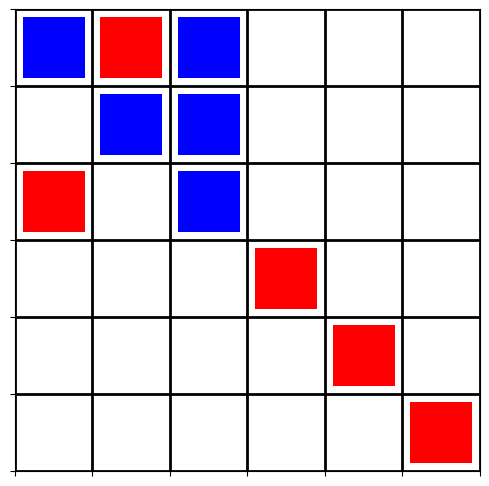

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 0 5
Enter the quadrant (1-4) to rotate: 3
Enter the direction (clockwise or counterclockwise): clockwise


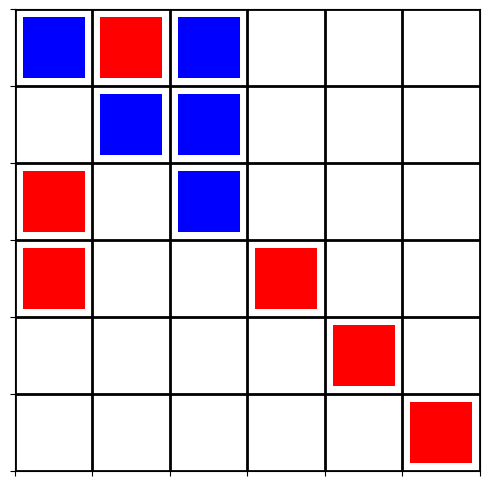

Player 2's turn
AI placed at (0, 1)
AI rotated quadrant 1 clockwise


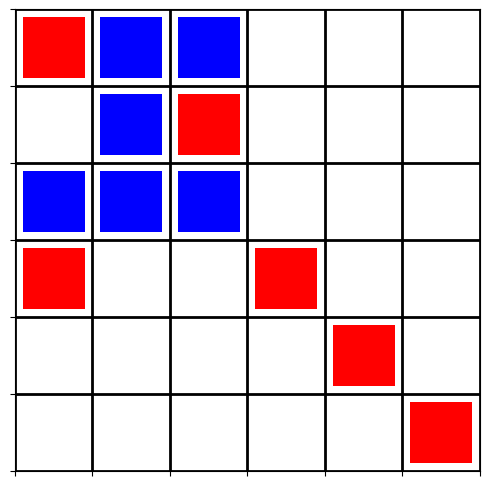

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 3 2
Enter the quadrant (1-4) to rotate: 4
Enter the direction (clockwise or counterclockwise): clockwise


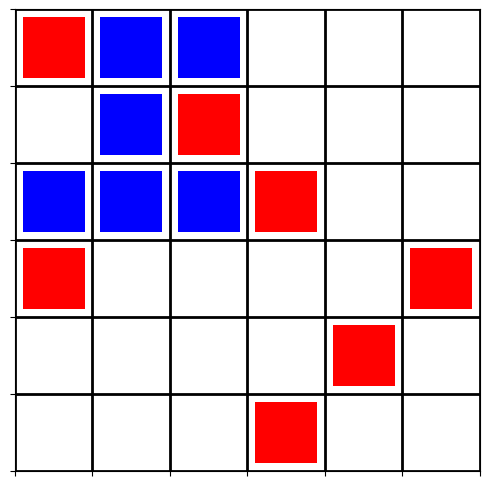

Player 2's turn
AI placed at (0, 1)
AI rotated quadrant 1 clockwise


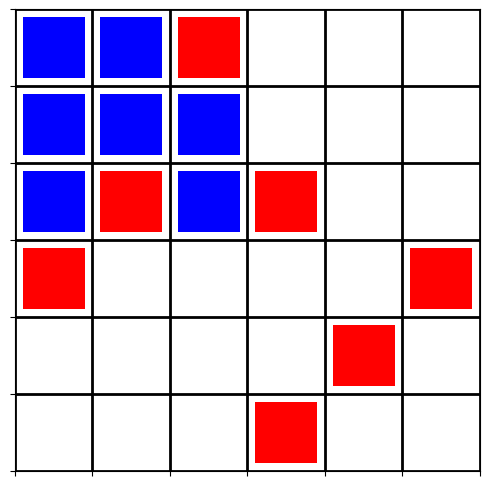

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 2 3
Enter the quadrant (1-4) to rotate: 4
Enter the direction (clockwise or counterclockwise): clockwise


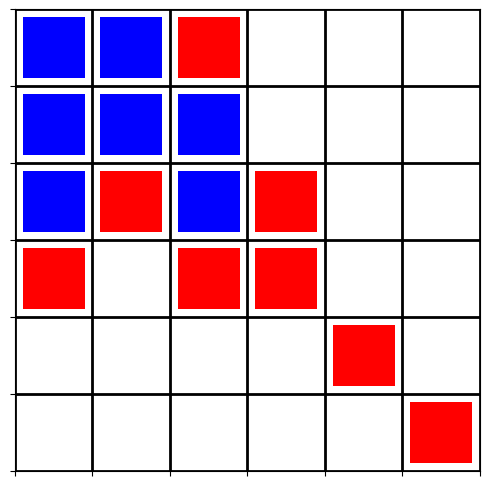

Player 2's turn
AI placed at (0, 4)
AI rotated quadrant 1 clockwise


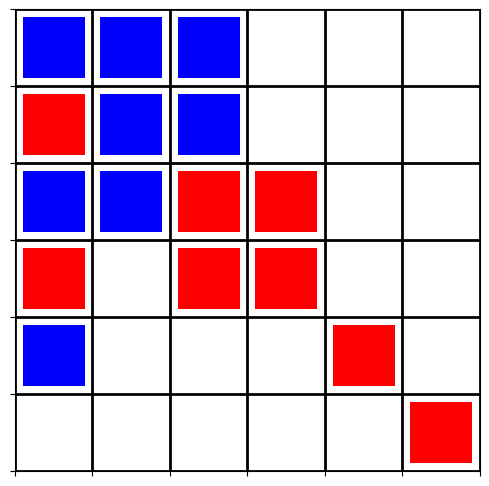

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 1 3
Enter the quadrant (1-4) to rotate: 2
Enter the direction (clockwise or counterclockwise): clockwise


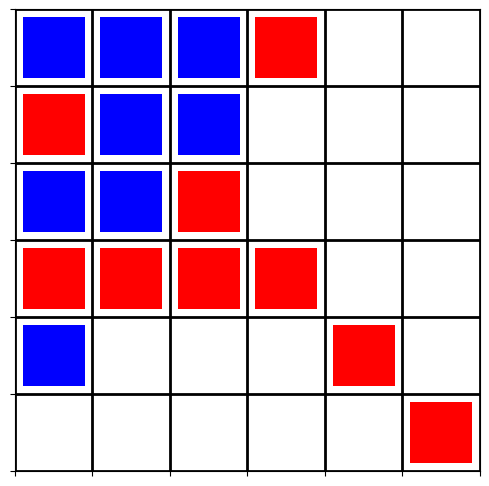

Player 2's turn
AI placed at (4, 3)
AI rotated quadrant 1 clockwise


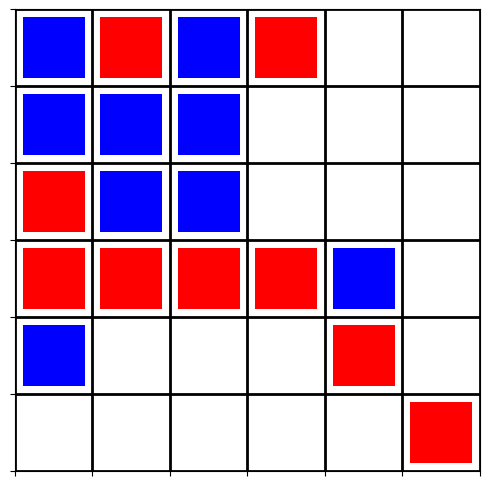

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 4 5
Enter the quadrant (1-4) to rotate: 1
Enter the direction (clockwise or counterclockwise): clockwise


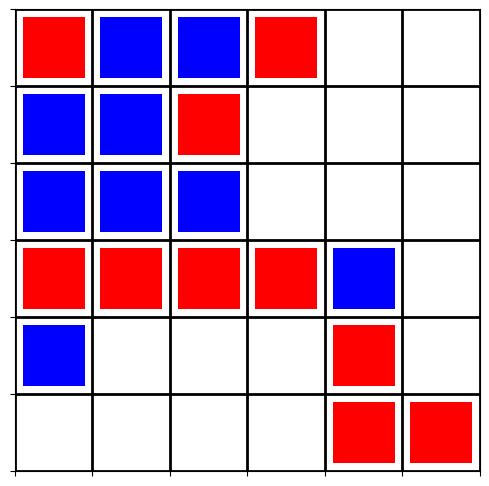

Player 2's turn
AI placed at (0, 5)
AI rotated quadrant 1 clockwise


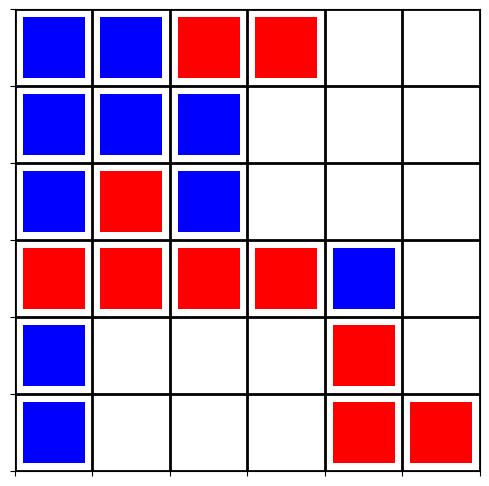

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 3 5
Enter the quadrant (1-4) to rotate: 1
Enter the direction (clockwise or counterclockwise): clockwise


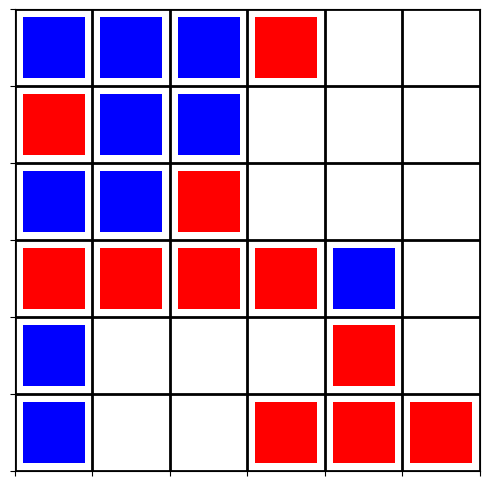

Player 2's turn
AI placed at (1, 4)
AI rotated quadrant 1 clockwise


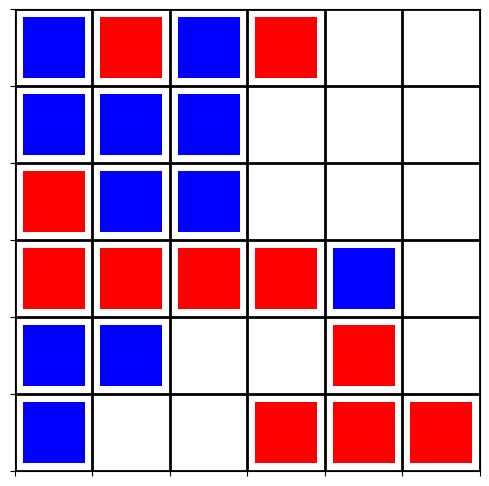

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 3 4
Enter the quadrant (1-4) to rotate: 1
Enter the direction (clockwise or counterclockwise): clockwise


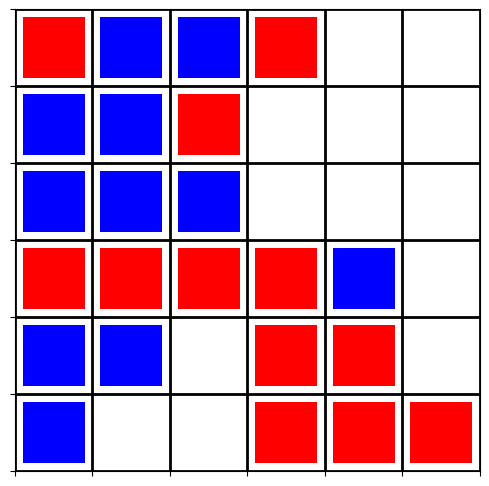

Player 2's turn
AI placed at (1, 5)
AI rotated quadrant 1 clockwise


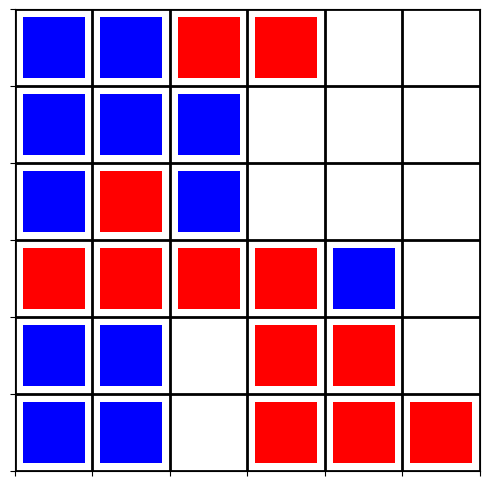

Player 1's turn
Enter the coordinates (x y) to place your marker (0-5): 5 4
Enter the quadrant (1-4) to rotate: 4
Enter the direction (clockwise or counterclockwise): clockwise


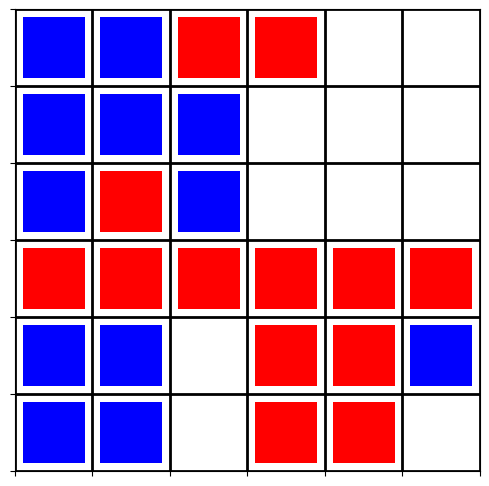

Player 1 wins!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Initialize the game board
def initialize_board():
    return np.zeros((6, 6), dtype=int)

# Display the board
def display_board(board):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(-.5, 6, 1))
    ax.set_yticks(np.arange(-.5, 6, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='major', color='k', linestyle='-', linewidth=2)

    for i in range(6):
        for j in range(6):
            if board[i, j] == 1:
                ax.add_patch(Rectangle((j - 0.4, 5 - i - 0.4), 0.8, 0.8, facecolor='red'))
            elif board[i, j] == 2:
                ax.add_patch(Rectangle((j - 0.4, 5 - i - 0.4), 0.8, 0.8, facecolor='blue'))

    plt.show()

# Place a marker on the board
def place_marker(board, x, y, player):
    if board[y, x] == 0:
        board[y, x] = player
        return True
    return False

# Rotate a 3x3 quadrant
def rotate_quadrant(board, quadrant, direction):
    if quadrant == 1:
        sub_board = board[:3, :3]
    elif quadrant == 2:
        sub_board = board[:3, 3:]
    elif quadrant == 3:
        sub_board = board[3:, :3]
    elif quadrant == 4:
        sub_board = board[3:, 3:]

    if direction == 'clockwise':
        rotated_sub_board = np.rot90(sub_board, -1)
    else:
        rotated_sub_board = np.rot90(sub_board, 1)

    if quadrant == 1:
        board[:3, :3] = rotated_sub_board
    elif quadrant == 2:
        board[:3, 3:] = rotated_sub_board
    elif quadrant == 3:
        board[3:, :3] = rotated_sub_board
    elif quadrant == 4:
        board[3:, 3:] = rotated_sub_board

# Check for a win
def check_win(board):
    for player in [1, 2]:
        # Check horizontal and vertical
        for i in range(6):
            for j in range(2):
                # Check horizontal
                if j + 4 < 6 and np.all(board[i, j:j+5] == player):
                    return player
                # Check vertical
                if j + 4 < 6 and np.all(board[j:j+5, i] == player):
                    return player

        # Check diagonal (top-left to bottom-right) and anti-diagonal (top-right to bottom-left)
        for i in range(2):
            for j in range(2):
                # Check diagonal
                if np.all([board[i + k, j + k] == player for k in range(5)]):
                    return player
                # Check anti-diagonal
                if np.all([board[i + k, j + 4 - k] == player for k in range(5)]):
                    return player

    return 0

# Evaluate the board for minimax
def evaluate_board(board):
    winner = check_win(board)
    if winner == 1:
        return 100
    elif winner == 2:
        return -100
    return 0

# Minimax with Alpha-Beta Pruning
def minimax(board, depth, is_maximizing, alpha, beta):
    score = evaluate_board(board)
    if score == 100 or score == -100 or depth == 0:
        return score

    if is_maximizing:
        max_eval = -float('inf')
        for x in range(6):
            for y in range(6):
                if board[y, x] == 0:
                    board[y, x] = 1
                    eval = minimax(board, depth - 1, False, alpha, beta)
                    board[y, x] = 0
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        break
        return max_eval
    else:
        min_eval = float('inf')
        for x in range(6):
            for y in range(6):
                if board[y, x] == 0:
                    board[y, x] = 2
                    eval = minimax(board, depth - 1, True, alpha, beta)
                    board[y, x] = 0
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        break
        return min_eval

# Best Move function
def best_move(board, player):
    best_score = -float('inf') if player == 1 else float('inf')
    move = None
    for x in range(6):
        for y in range(6):
            if board[y, x] == 0:
                board[y, x] = player
                score = minimax(board, 3, player == 2, -float('inf'), float('inf'))  # Depth of 3 for demonstration
                board[y, x] = 0
                if (player == 1 and score > best_score) or (player == 2 and score < best_score):
                    best_score = score
                    move = (x, y)
    return move

# Main game loop
def play_game():
    board = initialize_board()
    current_player = 1
    move_count = 0

    while move_count < 36:
        display_board(board)
        print(f"Player {current_player}'s turn")

        valid_input = False
        while not valid_input:
            try:
                if current_player == 1:
                    x, y = map(int, input("Enter the coordinates (x y) to place your marker (0-5): ").split())
                    if not (0 <= x <= 5 and 0 <= y <= 5):
                        raise ValueError
                else:  # AI move
                    x, y = best_move(board, current_player)
                    print(f"AI placed at ({x}, {y})")

                if place_marker(board, x, y, current_player):
                    valid_input = True
                else:
                    print("Invalid move. Cell already occupied. Try again.")
            except ValueError:
                print("Invalid input. Coordinates must be two integers between 0 and 5. Try again.")

        if current_player == 1:
            while True:
                try:
                    quadrant = int(input("Enter the quadrant (1-4) to rotate: "))
                    if quadrant not in [1, 2, 3, 4]:
                        raise ValueError
                    direction = input("Enter the direction (clockwise or counterclockwise): ").strip().lower()
                    if direction not in ['clockwise', 'counterclockwise']:
                        raise ValueError
                    break
                except ValueError:
                    print("Invalid input. Please enter a valid quadrant (1-4) and direction (clockwise or counterclockwise).")
        else:
            quadrant, direction = 1, 'clockwise'  # AI's default rotation
            print(f"AI rotated quadrant {quadrant} {direction}")

        rotate_quadrant(board, quadrant, direction)

        winner = check_win(board)
        if winner:
            display_board(board)
            print(f"Player {winner} wins!")
            return

        current_player = 3 - current_player
        move_count += 1

    print("It's a draw!")

# Run the game
play_game()